### Readme
This notebook demonstrates applying PCA for dimensionality reduction. We will walk through the following steps:

2. **TF-IDF Vectorization:** Transform the cleaned text data into TF-IDF vectors.
3. **PCA Transformation:** Apply PCA to reduce the dimensionality of the TF-IDF vectors.
4. **Variance Analysis:** Analyze the explained variance to determine the effectiveness of the PCA transformation.

## Contents
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Load Data](#2.-Load-Data)
- [6. PCA Transformation and Variance Analysis](#6.-PCA-Transformation-and-Variance-Analysis)
- [7. Conclusion](#7.-Conclusion)
- [8. Convert the reduced TF-IDF vectors to a DataFrame](#8.-Convert-the-reduced-TF-IDF-vectors-to-a-DataFrame
)



### Import and Get Data

In [5]:
# 1. Import
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.feature_extraction.text import CountVectorizer

# 2. Get data
df = pd.read_csv('transformed_data_exp_2.csv')
df.shape


(18051, 9)

### TF-IDF Vectorization and Feature Count

In [6]:
# 3. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.99, 
    min_df=10
)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['clean_lemm_preprocessed_text'])

# Count the number of features
num_features = len(tfidf_vectorizer.get_feature_names_out())
print(f"Number of features created: {num_features}")

Number of features created: 7496


### PCA Transformation and Variance Analysis

Using 700 components
Working on PCA
Elapsed time: 48.26240372657776 seconds
Number of features after PCA: 700


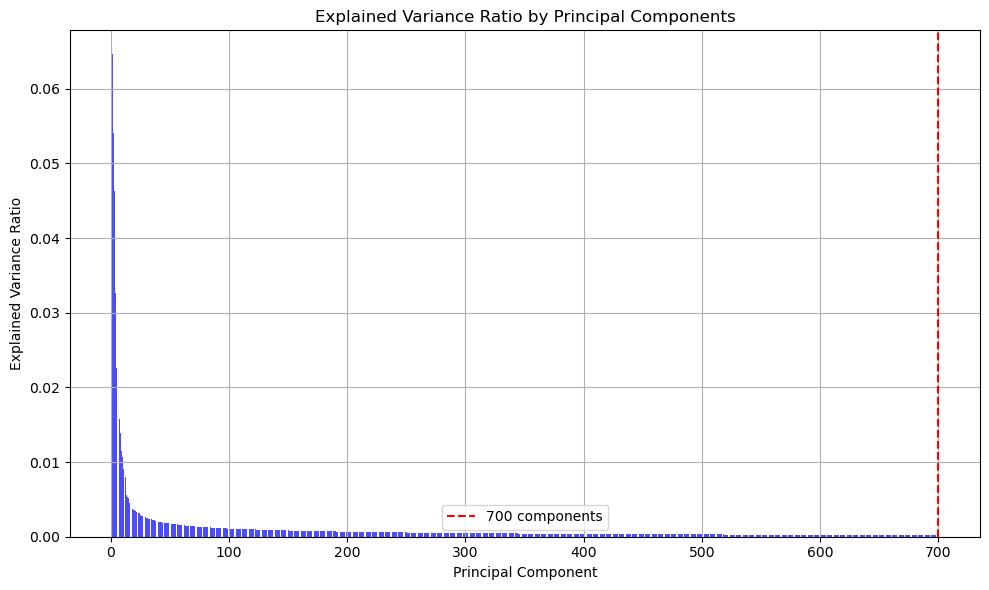

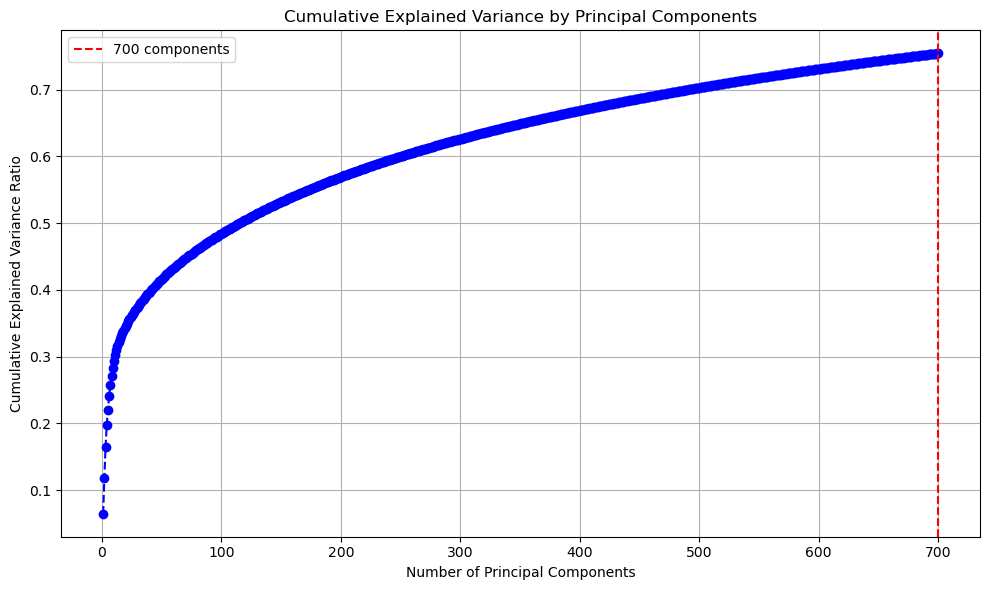

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with 1300 components
pca = PCA(n_components=700)
pca.fit(tfidf_vectors.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the number of components
print("Using 700 components")

# Refit PCA with 700 components
print("Working on PCA")
start_time = time.time()
tfidf_vectors_reduced = pca.fit_transform(tfidf_vectors.toarray())
end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")

# Count the number of features after PCA
num_features_reduced = tfidf_vectors_reduced.shape[1]
print(f"Number of features after PCA: {num_features_reduced}")

# Plot explained variance ratio as a histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b', alpha=0.7)
plt.axvline(x=700, color='r', linestyle='--', label='700 components')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('explained_variance_ratio_histogram_700.png')

# Show the plot
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axvline(x=700, color='r', linestyle='--', label='700 components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_explained_variance_ratio_plot_700.png')

# Show the plot
plt.show()


### Conclusion

- **Cumulative Explained Variance Plot**
The cumulative explained variance plot shows that 700 components are required to capture slightly over 75% of the total variance. The curve rises steeply initially and then starts to flatten out, indicating diminishing returns for each additional component.
- **Explained Variance Ratio Histogram**
The histogram shows that the first few principal components explain a significant portion of the variance, while the contribution of each subsequent component rapidly decreases.
- **Conclusion**
- **Conclusion**
700 components were selected to capture slightly over 75% of the variance. This decision was made to address the overfitting observed in the current model.

### Convert the reduced TF-IDF vectors to a DataFrame

In [12]:
tfidf_features_df = pd.DataFrame(tfidf_vectors_reduced, columns=[f'tfidf_feature_{i}' for i in range(1, num_features_reduced + 1)])
# Export the reduced TF-IDF features to a CSV file
tfidf_features_df.to_csv('tfidf_features_exp_2_pca_700.csv', index=False)

In [13]:
tfidf_features_df.shape

(18051, 700)

In [14]:
tfidf_features_df.head()

,tfidf_feature_1,tfidf_feature_2,tfidf_feature_3,tfidf_feature_4,tfidf_feature_5,tfidf_feature_6,tfidf_feature_7,tfidf_feature_8,tfidf_feature_9,tfidf_feature_10,...,tfidf_feature_691,tfidf_feature_692,tfidf_feature_693,tfidf_feature_694,tfidf_feature_695,tfidf_feature_696,tfidf_feature_697,tfidf_feature_698,tfidf_feature_699,tfidf_feature_700
0,-0.040691,-0.050105,-0.016486,0.074816,0.408716,0.074145,0.168277,-0.078291,-0.025441,-0.067778,...,-0.000386,-0.006055,-0.028146,0.011926,0.010833,0.012237,0.011978,-0.005328,0.005597,0.001023
1,-0.055458,-0.061811,-0.013799,0.090925,0.551824,0.078572,0.265133,-0.100249,-0.016853,-0.179938,...,0.018467,-0.000442,-0.023700,0.012556,-0.017470,-0.026049,-0.012542,-0.016470,0.008113,0.012983
2,0.528772,0.135876,0.008082,-0.040504,-0.080440,-0.000976,0.038992,-0.102444,-0.072109,-0.016688,...,-0.012100,0.017915,-0.015716,0.001566,0.001397,-0.010406,-0.020107,0.004550,0.001367,0.015434
3,-0.277869,0.447509,-0.004394,-0.064077,-0.015669,-0.017686,-0.008404,0.023507,-0.011034,-0.019734,...,0.012536,-0.006154,-0.009989,-0.009163,0.017202,-0.015499,0.001296,0.003428,0.008235,-0.012572
4,-0.050562,-0.063374,-0.008081,0.089009,0.496256,0.081958,0.211691,-0.113303,-0.012863,-0.097411,...,0.011904,0.021259,-0.005599,0.002341,-0.006292,0.013343,-0.005584,-0.017835,-0.010962,0.001455
